# ===============================================================

# AIR QUALITY PREDICTION

# ===============================================================

# 

## importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler  # import normalisation package
from sklearn.model_selection import train_test_split  # import train test split
# import linear regression package
from sklearn.linear_model import LinearRegression
# import metrics
from sklearn import metrics
# import random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR  # import support vector regressor

## reading the dataset

### it is a ';' seperated file so we'll specify it as a parameter for the read_csv function

In [2]:
df = pd.read_csv(
    "/home/dhanola/KUBUNTU/DATASET/CSV_FILES/AirQualityUCI.csv", sep=';')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


## data preprocessing

### The data contains null values. So we drop those rows and columns containing nulls.

In [3]:
df.dropna(how="all", axis=0, inplace=True)
df.dropna(how="all", axis=1, inplace=True)

### The last few lines(specifically 9357 to 9471) of the dataset are empty and of no use. So we'll ignore them too:



In [4]:
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,04/04/2005,10.00.00,"3,1",1314.0,-200.0,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3","0,7568"
9353,04/04/2005,11.00.00,"2,4",1163.0,-200.0,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119"
9354,04/04/2005,12.00.00,"2,4",1142.0,-200.0,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406"
9355,04/04/2005,13.00.00,"2,1",1003.0,-200.0,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139"
9356,04/04/2005,14.00.00,"2,2",1071.0,-200.0,"11,9",1047.0,265.0,654.0,168.0,1129.0,816.0,"28,5","13,1","0,5028"


### the values in our data don't contain decimal places but have weird commas in place of them. For example 9.4 is written as 9,4. We'll correct it using the following piece of code:

In [5]:
cols = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
        'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH'
        ]
for col in cols:
    if df[col].dtype != 'float64':
        str_x = pd.Series(df[col]).str.replace(',', '.')
        float_X = []
        for value in str_x.values:
            fv = float(value)
            float_X.append(fv)

            df[col] = pd.DataFrame(float_X)

df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


## data visualization

### Understand co-relation between variables

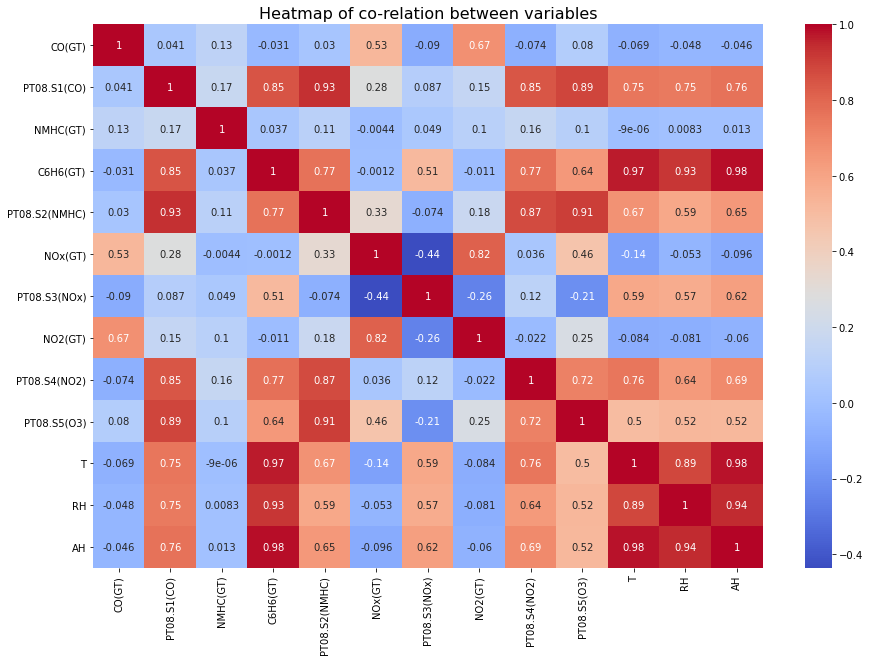

In [6]:
plt.subplots(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of co-relation between variables', fontsize=16)
plt.show()

### Try to understand degree of linearity between relative humidity (RH) output and other input features

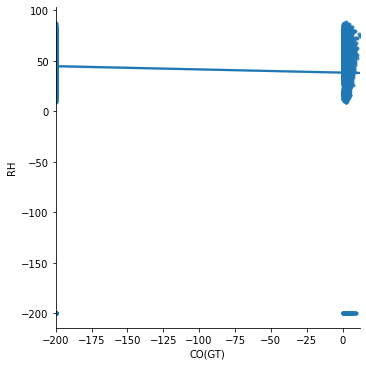

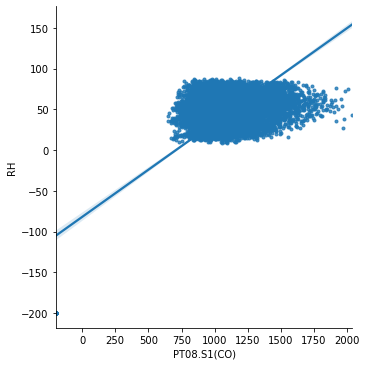

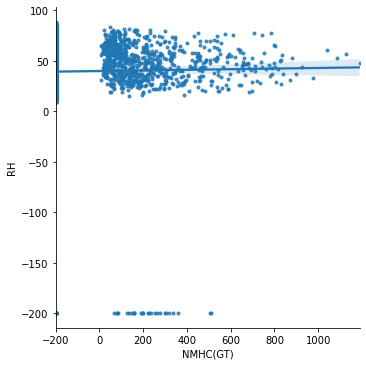

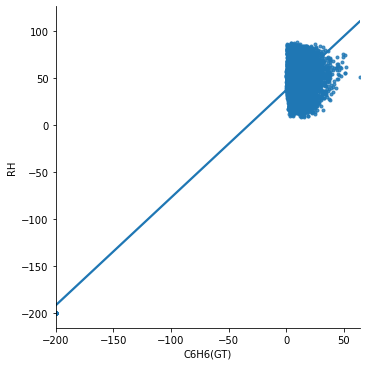

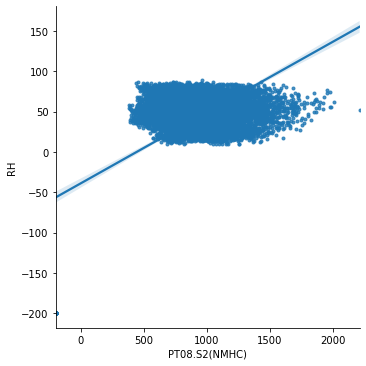

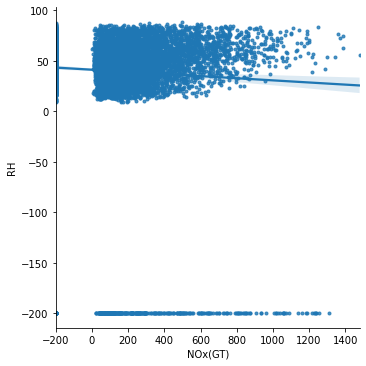

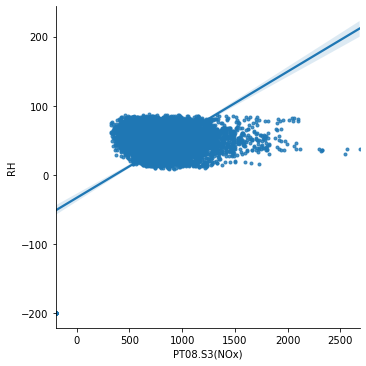

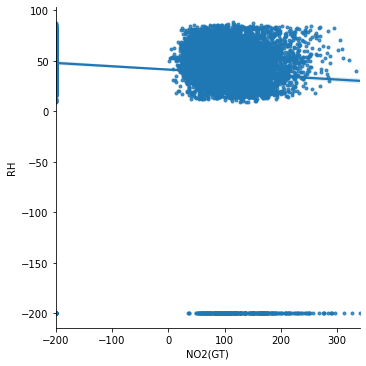

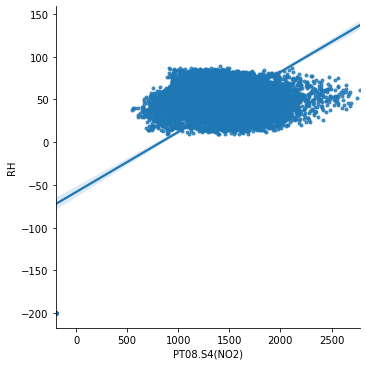

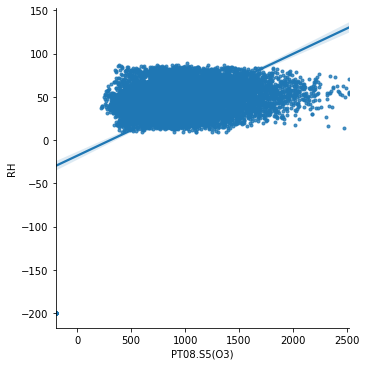

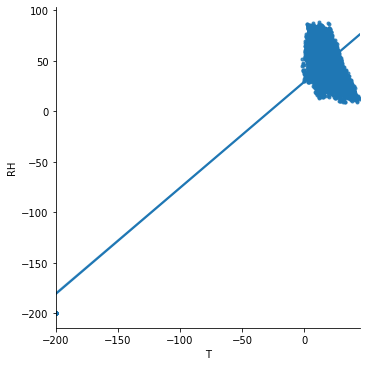

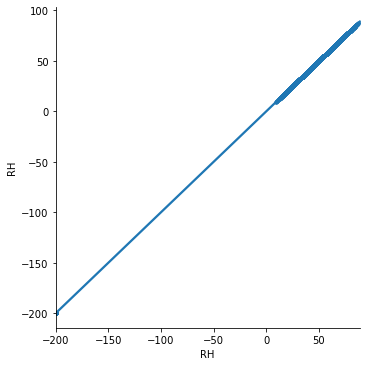

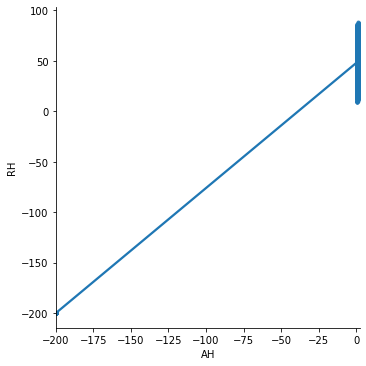

In [7]:
col_ = df.columns.tolist()[2:]
for i in col_:
    sns.lmplot(x=i, y='RH', data=df, markers='.')

## model development

### 1. Linear Regression

## 

### Define Feature (X) and Target (y)

In [8]:
X = df[col_].drop('RH', 1)  # X-input features
y = df['RH']  # y-input features

### Normalize Feature variable

In [9]:
ss = StandardScaler()  # initiatilise
X_std = ss.fit_transform(X)  # apply stardardisation

### Train test split
#### split the data into train and test with test size and 20% and train size as 80

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X_std, y, test_size=0.2, random_state=45)
print('Training data size:', X_train.shape)
print('Test data size:', X_test.shape)

Training data size: (7485, 12)
Test data size: (1872, 12)


### Train the model

In [11]:
lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)  # fit the linear model on train data
print('Intercept:', lr_model.intercept_)
print('--------------------------------')
print('Slope of each feature:')
list(zip(X.columns.tolist(), lr_model.coef_))

Intercept: 39.47079743471215
--------------------------------
Slope of each feature:


[('CO(GT)', 0.35771967672140775),
 ('PT08.S1(CO)', 3.442152284611967),
 ('NMHC(GT)', -2.2413417065420407),
 ('C6H6(GT)', -54.026314904586485),
 ('PT08.S2(NMHC)', -14.835101258919487),
 ('NOx(GT)', 8.041837348507718),
 ('PT08.S3(NOx)', -6.046280565215073),
 ('NO2(GT)', -6.632654803126335),
 ('PT08.S4(NO2)', 27.355531302422285),
 ('PT08.S5(O3)', -0.23331220209324116),
 ('T', -87.37485480717537),
 ('AH', 179.54437072590204)]

### Root Mean Squared Error (RMSE) Value


In [12]:
y_pred = lr_model.predict(X_test)  # predict using the model
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))  # calculate rmse
print('Baseline RMSE of model:', rmse)

Baseline RMSE of model: 8.137116452420578


### model accuracy

In [13]:
print("the model have accuracy of:", metrics.r2_score(y_test, y_pred)*100, "%")

the model have accuracy of: 97.61322678975506 %


### 2. Random Forest

## 

### Train the model

In [14]:
rf_reg = RandomForestRegressor()
rf_model = rf_reg.fit(X_train, y_train)  # fit model
y_pred_rf = rf_model.predict(X_test)  # predict

### Root Mean Squared Error (RMSE) Value


In [15]:
print('RMSE of predicted RH in RF model:', np.sqrt(
    metrics.mean_squared_error(y_test, y_pred_rf)))

RMSE of predicted RH in RF model: 0.5758859613599292


### model accuracy

In [16]:
print("the model have accuracy of:",
      metrics.r2_score(y_test, y_pred_rf)*100, "%")

the model have accuracy of: 99.98804517907132 %


### 3. Support Vector Machines (SVM)

## 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X_std, y, test_size=0.2, random_state=45)
print('Training data size:', X_train.shape)
print('Test data size:', X_test.shape)

Training data size: (7485, 12)
Test data size: (1872, 12)


### Train the model

In [18]:
sv_reg = SVR()
sv_model = sv_reg.fit(X_train, y_train)  # train the model

### Root Mean Squared Error (RMSE) Value


In [19]:
y_pred_sv = sv_model.predict(X_test)  # predict
print('RMSE of SVR model:', np.sqrt(
    metrics.mean_squared_error(y_test, y_pred_sv)))

RMSE of SVR model: 14.981973625991198


### model accuracy

In [20]:
print("the model have accuracy of:",
      metrics.r2_score(y_test, y_pred_sv)*100, "%")

the model have accuracy of: 91.90888920291809 %


# 

# ===============================================================

# THE END

# ===============================================================